In [1]:
#from astropy.io import fits
import pandas as pd
#pd.options.display.max_rows = None
from astropy.table import Table
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
from numcosmo_py import Ncm, Nc
from numcosmo_py.external.pyssc import pyssc as PySSC

Ncm.cfg_init()

In [2]:
catalog_detections = Table.read('JPAS_mock_cut_map_detections_refined_amico.fits', format='fits')
catalog_detections_df = catalog_detections.to_pandas()
display(catalog_detections_df.columns.tolist())
catalog_detections_df.sort_values('SN')
#display(catalog_detections_df["SN"])

['ID',
 'Xpix',
 'Ypix',
 'Zpix',
 'Xphys',
 'Yphys',
 'Zphys',
 'SN',
 'SN_NO_CLUSTER',
 'AMP',
 'RICH',
 'LIKE',
 'MSKFRC',
 'POISS',
 'LAMB',
 'LAMBSTAR',
 'ZPIX_SIGM',
 'ZPIX_SIGP',
 'ZPHYS_SIGM',
 'ZPHYS_SIGP',
 'ODDS',
 'Pz-0',
 'Pz-1',
 'Pz-2',
 'Pz-3',
 'Pz-4',
 'Pz-5',
 'Pz-6',
 'Pz-7',
 'Pz-8',
 'Pz-9',
 'Pz-10',
 'Pz-11',
 'Pz-12',
 'Pz-13',
 'Pz-14',
 'Pz-15',
 'Pz-16',
 'Pz-17',
 'Pz-18',
 'Pz-19',
 'Pz-20',
 'Pz-21',
 'Pz-22',
 'Pz-23',
 'Pz-24',
 'Pz-25',
 'Pz-26',
 'Pz-27',
 'Pz-28',
 'Pz-29',
 'Pz-30',
 'Pz-31',
 'Pz-32',
 'Pz-33',
 'Pz-34',
 'Pz-35',
 'Pz-36',
 'Pz-37',
 'Pz-38',
 'Pz-39',
 'Pz-40',
 'Pz-41',
 'Pz-42',
 'Pz-43',
 'Pz-44',
 'Pz-45',
 'Pz-46',
 'Pz-47',
 'Pz-48',
 'Pz-49',
 'Pz-50',
 'Pz-51',
 'Pz-52',
 'Pz-53',
 'Pz-54',
 'Pz-55',
 'Pz-56',
 'Pz-57',
 'Pz-58',
 'Pz-59',
 'Pz-60',
 'Pz-61',
 'Pz-62',
 'Pz-63',
 'Pz-64',
 'Pz-65',
 'Pz-66',
 'Pz-67',
 'Pz-68',
 'Pz-69',
 'Pz-70',
 'Pz-71',
 'Pz-72',
 'Pz-73',
 'Pz-74',
 'Pz-75',
 'Pz-76',
 'Pz-77',
 'Pz-

,ID,Xpix,Ypix,Zpix,Xphys,Yphys,Zphys,SN,SN_NO_CLUSTER,AMP,...,Pz-170,Pz-171,Pz-172,Pz-173,Pz-174,Pz-175,Pz-176,Pz-177,Pz-178,Pz-179
59099,59100,1307,1081,142,173.98056,45.138559,0.7175,0.693898,6.000121,0.757338,...,5.410082e-03,4.892572e-03,4.408702e-03,3.958395e-03,3.541260e-03,3.156624e-03,2.803568e-03,2.480964e-03,2.187508e-03,1.921759e-03
48899,48900,925,437,142,171.20471,41.980834,0.7175,0.694096,6.003507,0.757765,...,2.025448e-03,1.790388e-03,1.580977e-03,1.394695e-03,1.229189e-03,1.082288e-03,9.520067e-04,8.365438e-04,7.342775e-04,6.437535e-04
58968,58969,783,324,142,170.24856,41.422214,0.7175,0.694613,6.012336,0.758880,...,1.033184e-03,8.913371e-04,7.685534e-04,6.624236e-04,5.707830e-04,4.917050e-04,4.234908e-04,3.646526e-04,3.138961e-04,2.701014e-04
58945,58946,389,37,142,167.68207,39.961994,0.7175,0.694730,6.014330,0.759132,...,4.793962e-03,4.275841e-03,3.799349e-03,3.363427e-03,2.966648e-03,2.607282e-03,2.283369e-03,1.992777e-03,1.733264e-03,1.502533e-03
58939,58940,605,443,142,169.05475,42.013398,0.7175,0.694765,6.014929,0.759207,...,3.076291e-03,2.669405e-03,2.302304e-03,1.973700e-03,1.681830e-03,1.424561e-03,1.199492e-03,1.004050e-03,8.355701e-04,6.913771e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,21,89,194,43,165.68033,40.684986,0.2225,5.352644,62.550228,2.792169,...,2.635336e-09,2.086343e-09,1.648844e-09,1.300992e-09,1.025022e-09,8.065340e-10,6.338932e-10,4.977274e-10,3.905101e-10,3.062149e-10
11,12,345,1550,55,167.03614,47.515862,0.2825,5.626035,67.276664,3.319997,...,3.622861e-08,3.050180e-08,2.563609e-08,2.150995e-08,1.801757e-08,1.506710e-08,1.257899e-08,1.048456e-08,8.724631e-09,7.248360e-09
5,6,289,1265,54,166.70800,46.081118,0.2775,5.831639,76.506234,3.654571,...,2.700542e-08,2.310516e-08,1.974131e-08,1.684355e-08,1.435040e-08,1.220815e-08,1.036993e-08,8.794791e-09,7.447065e-09,6.295655e-09
0,1,515,473,62,168.44613,42.156442,0.3175,5.867690,87.033669,4.090747,...,5.967026e-08,5.070822e-08,4.300891e-08,3.640778e-08,3.075972e-08,2.593703e-08,2.182759e-08,1.833315e-08,1.536782e-08,1.285672e-08


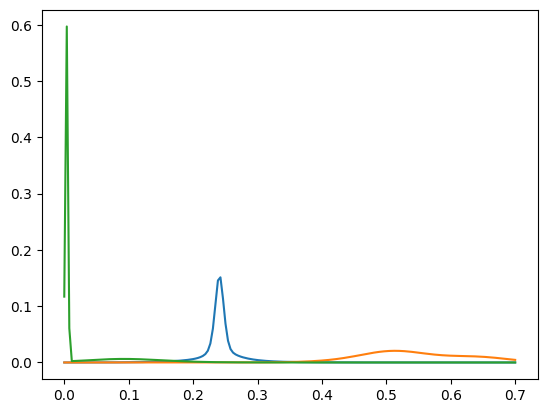

In [3]:
pz_0 = []
z = np.linspace(0,0.7 , 180)
for i in range(180):
    pz_0.append(catalog_detections_df['Pz-%i' %(i)].values[0])

plt.plot(z , pz_0)

pz_46607 = []
z = np.linspace(0,0.7 , 180)
for i in range(180):
    pz_46607.append(catalog_detections_df['Pz-%i' %(i)].values[46607])

plt.plot(z , pz_46607)


pz_55770 = []
z = np.linspace(0,0.7 , 180)
for i in range(180):
    pz_55770.append(catalog_detections_df['Pz-%i' %(i)].values[55770])

plt.plot(z , pz_55770)

plt.show()

In [4]:
area = 4109.3
cosmo = Nc.HICosmoDEXcdm()
cosmo.omega_x2omega_k()
cosmo.param_set_by_name("H0", 67.74)
cosmo.param_set_by_name("Omegab", 0.0486)
cosmo.param_set_by_name("Omegak", 0.00)
cosmo.param_set_by_name("Omegac", 0.2603)
cosmo.param_set_by_name("w", -1.0)


prim = Nc.HIPrimPowerLaw.new()
prim.param_set_by_name("ln10e10ASA", 3.02745)
prim.param_set_by_name("n_SA", 0.9667)

reion = Nc.HIReionCamb.new()

cosmo.add_submodel(prim)
cosmo.add_submodel(reion)

dist = Nc.Distance.new(2.0)

tf = Nc.TransferFuncEH()

psml = Nc.PowspecMLTransfer.new(tf)
psml.require_kmin(1.0e-6)
psml.require_kmax(1.0e3)

psf = Ncm.PowspecFilter.new(psml, Ncm.PowspecFilterType.TOPHAT)
psf.set_best_lnr0()

mulf = Nc.MultiplicityFuncTinker.new()
mulf.set_mdef(Nc.MultiplicityFuncMassDef.CRITICAL)
mulf.set_Delta(200.0)

hmf = Nc.HaloMassFunction.new(dist, psf, mulf)
hmf.set_area(area * (np.pi / 180) ** 2)
hmf.prepare(cosmo)
hbias_Tinker = Nc.HaloBiasTinker.new(hmf)
cad = Nc.ClusterAbundance.new(hmf, hbias_Tinker)
cad.set_area(area * (np.pi / 180) ** 2)
hmf.prepare(cosmo)

#σ_8 = 0.8159

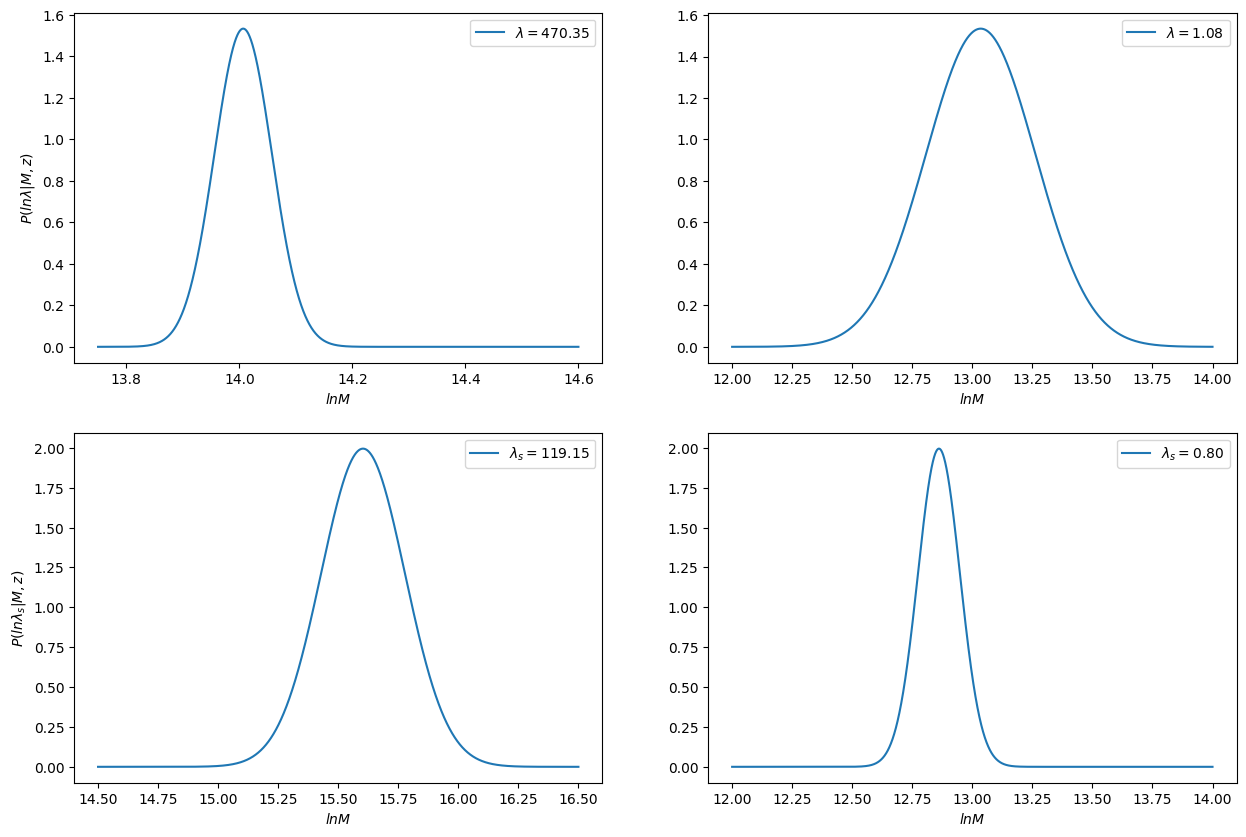

In [5]:
#mass proxy
cluster_m_lamb = Nc.ClusterMassAscaso(lnRichness_min = 0.0 ,lnRichness_max = np.log(60.0))
cluster_m_lamb.param_set_by_name("mup0", 4.9)
cluster_m_lamb.param_set_by_name("mup1", 0.993)
cluster_m_lamb.param_set_by_name("mup2", 0)
cluster_m_lamb.param_set_by_name("sigmap0", 0.26)
cluster_m_lamb.param_set_by_name("sigmap1", 0.0)
cluster_m_lamb.param_set_by_name("sigmap2", 0.0)

cluster_m_lamb.set_property("mup0_fit", True)
cluster_m_lamb.set_property("mup1_fit", True)
cluster_m_lamb.set_property("sigmap0_fit", True)

cluster_m_lambstar = Nc.ClusterMassAscaso(lnRichness_min = 0.0 ,lnRichness_max = np.log(25))
cluster_m_lambstar.param_set_by_name("mup0", 3.807)
cluster_m_lambstar.param_set_by_name("mup1", 0.993)
cluster_m_lambstar.param_set_by_name("mup2", 0)
cluster_m_lambstar.param_set_by_name("sigmap0", 0.2)
cluster_m_lambstar.param_set_by_name("sigmap1", 0.0)
cluster_m_lambstar.param_set_by_name("sigmap2", 0.0)

cluster_m_lambstar.set_property("mup0_fit", True)
cluster_m_lambstar.set_property("mup1_fit", True)
cluster_m_lambstar.set_property("sigmap0_fit", True)


#photo-z
cluster_z = Nc.ClusterRedshiftNodist (z_min = 0.0 , z_max = 0.7)

#mass-proxy plots
masses_high_lamb  = np.linspace(np.log(10) *14.6 , np.log(10) * 16.5,10000)
masses_10_high_lamb  = np.linspace(13.75 ,14.6,10000)
relation_high_lamb = []

masses_low_lamb  = np.linspace(np.log(10) *12 , np.log(10) * 13.0,10000)
masses_10_low_lamb  = np.linspace(12.0 ,14.0,10000)
relation_low_lamb = []

masses_high_lambstar  = np.linspace(np.log(10) *14.5 , np.log(10) * 15.5,10000)
masses_10_high_lambstar  = np.linspace(14.5 ,16.5,10000)
relation_high_lambstar = []

masses_low_lambstar  = np.linspace(np.log(10) *12 , np.log(10) * 14.0,10000)
masses_10_low_lambstar  = np.linspace(12.0 ,14.0,10000)
relation_low_lambstar = []

for i in range(len(masses_high_lamb)):
    relation_high_lamb.append(cluster_m_lamb.p(cosmo , masses_high_lamb[i], 0.1 , [np.log(470.350090)] , None))
    relation_low_lamb.append(cluster_m_lamb.p(cosmo , masses_low_lamb[i], 0.1 , [np.log(1.082300)] , None))

    relation_high_lambstar.append(cluster_m_lambstar.p(cosmo , masses_high_lambstar[i], 0.1 , [np.log(119.153600)] , None))
    relation_low_lambstar.append(cluster_m_lambstar.p(cosmo , masses_low_lambstar[i], 0.1 , [np.log(0.795985)] , None))

plt.figure(figsize = (15,10))

plt.subplot(2, 2, 1)
plt.plot(masses_10_high_lamb , relation_high_lamb , label = r"$\lambda = %.2f$" %(470.350090))
plt.ylabel(r'$P(ln\lambda|M,z)$')
plt.xlabel(r'$lnM$')
plt.legend()


plt.subplot(2, 2, 2)
plt.plot(masses_10_low_lamb , relation_low_lamb , label = r"$\lambda = %.2f$" %(1.082300))
plt.xlabel(r'$lnM$')
plt.legend()


plt.subplot(2, 2, 3)
plt.plot(masses_10_high_lambstar , relation_high_lambstar , label = r"$\lambda_s = %.2f$" %(119.153600))
plt.ylabel(r'$P(ln\lambda_s|M,z)$')
plt.xlabel(r'$lnM$')
plt.legend()


plt.subplot(2, 2, 4)
plt.plot(masses_10_low_lambstar , relation_low_lambstar , label = r"$\lambda_s = %.2f$" %(0.795985))
plt.xlabel(r'$lnM$')
plt.legend()

plt.show()

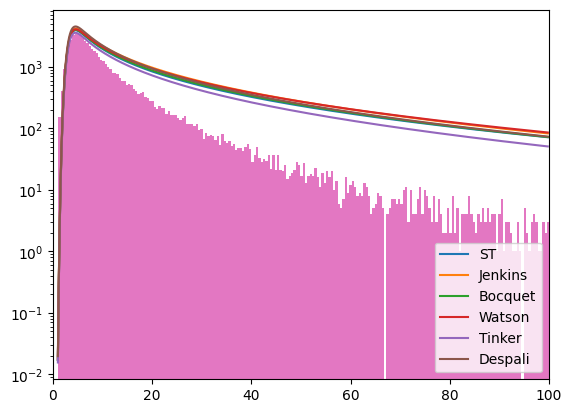

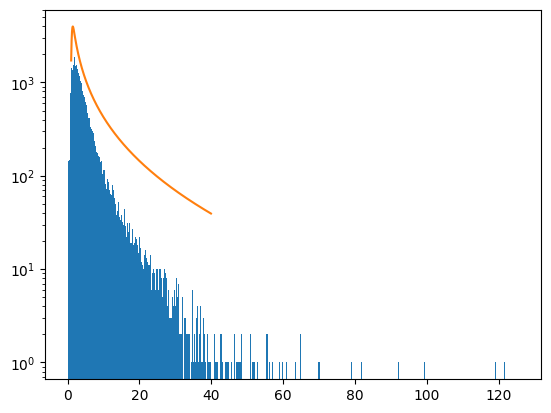

In [6]:
multiplicity = [Nc.MultiplicityFuncST.new() , Nc.MultiplicityFuncJenkins.new() , Nc.MultiplicityFuncBocquet.new()
               , Nc.MultiplicityFuncWatson.new() , Nc.MultiplicityFuncTinker.new() , Nc.MultiplicityFuncDespali.new()] 
legend = ['ST'  , 'Jenkins' , 'Bocquet' , "Watson" , 'Tinker' , 'Despali']

for mult in range(len(multiplicity)):

    richness = np.linspace(np.log(1) , np.log(100.0), 1000)
    richness_plot = []
    n_bin = []
    
    mulf = multiplicity[mult]
    if mult == 4:
        mulf.set_mdef(Nc.MultiplicityFuncMassDef.CRITICAL)
        mulf.set_Delta(200.0)
    if mult == 5:
        mulf.set_mdef(Nc.MultiplicityFuncMassDef.VIRIAL)

    hmf = Nc.HaloMassFunction.new(dist, psf, mulf)
    hmf.set_area(area * (np.pi / 180) ** 2)
    hmf.prepare(cosmo)
    cad = Nc.ClusterAbundance.new(hmf, None)
    cad.set_area(area * (np.pi / 180) ** 2)
    hmf.prepare(cosmo)

    for i in range(len(richness)-1):
        n_bin.append(cad.intp_bin_d2n(cosmo , cluster_z , cluster_m_lamb , [richness[i]] ,[richness[i+1]],None ,[0.0] , [0.7] , None))
        richness_plot.append(np.exp((richness[i] + richness[i+1])/2))
    
    
    
    
    plt.plot(richness_plot , n_bin , label = "%s" %(legend[mult]))
    plt.xlim(0 , 100)
    
    
    richness_plot = []
    n_bin = []
    richness = np.linspace(np.log(1) , np.log(40) , 1000)
    
    cad.prepare(cosmo , cluster_z , cluster_m_lambstar)
    cad.set_area(area * (np.pi / 180) ** 2)

plt.legend()
plt.hist(catalog_detections_df['LAMB'] , bins=len(richness))
plt.yscale("log")
plt.show()

for i in range(len(richness)-1):
    n_bin.append(cad.intp_bin_d2n(cosmo , cluster_z , cluster_m_lambstar , [richness[i]] ,[richness[i+1]],None ,[0] , [0.7] , None))
    richness_plot.append(np.exp((richness[i] + richness[i+1])/2))


plt.hist(catalog_detections_df['LAMBSTAR'] , bins=len(richness))
plt.plot(richness_plot , n_bin)
plt.yscale("log")
plt.show()


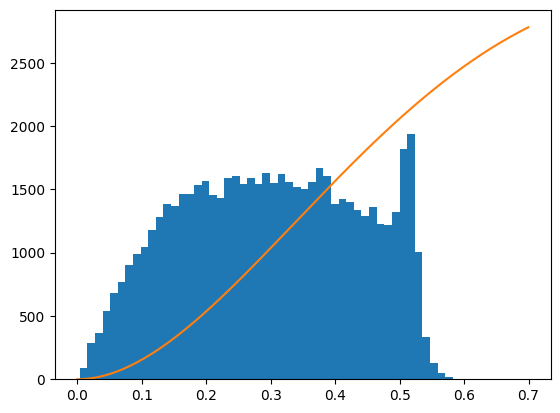

In [7]:
z = np.linspace(0.0,0.7 , 180)
z_array = []


for j in range(len(catalog_detections_df['ID'])):
    pz = []
    for i in range(180):
        pz.append(catalog_detections_df['Pz-%i' %(i)].values[j])
    z_array.append(z[pz.index(max(pz))])

z = np.linspace(0 , 0.7, 1000)
z_plot = []
n_bin = []

for i in range(len(z)-1):
        n_bin.append(cad.intp_bin_d2n(cosmo , cluster_z , cluster_m_lamb , [1] ,[np.log(60)],None ,[z[i]] , [z[i+1]] , None))
        z_plot.append((z[i] + z[i+1])/2)

plt.hist(z_array , bins= 50)
plt.plot(z_plot , n_bin)
plt.show()